# Data Preparation

In this section, we load the data, inspect missing values, convert data type, convert target to numerical

In [100]:
import numpy as np
import pandas as pd
import json

# Load Data

In [101]:
def read_data(path):
    '''
    this function will read the txt file which is a line-delimited json file and produce a pandas dataframe.
    
    '''
    my_list =[]
    with open(path) as f:
        for line in f:
            json_content = json.loads(line)
            my_list.append(json_content)
    #df = pd.DataFrame(my_list) 
    return(pd.DataFrame(my_list))
    

In [102]:
df = read_data('transactions.txt')

In [103]:
df.head()

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,...,merchantName,merchantState,merchantZip,posConditionCode,posEntryMode,posOnPremises,recurringAuthInd,transactionAmount,transactionDateTime,transactionType
0,733493772,2014-08-03,US,5000.00,492,9184,False,5000.0,0.00,04/2020,...,Lyft,,,01,05,,,111.33,2016-01-08T19:04:50,PURCHASE
1,733493772,2014-08-03,US,4888.67,492,9184,False,5000.0,111.33,06/2023,...,Uber,,,01,09,,,24.75,2016-01-09T22:32:39,PURCHASE
2,733493772,2014-08-03,US,4863.92,492,9184,False,5000.0,136.08,12/2027,...,Lyft,,,01,05,,,187.40,2016-01-11T13:36:55,PURCHASE
3,733493772,2014-08-03,US,4676.52,492,9184,False,5000.0,323.48,09/2029,...,Lyft,,,01,02,,,227.34,2016-01-11T22:47:46,PURCHASE
4,733493772,2014-08-03,US,4449.18,492,9184,False,5000.0,550.82,10/2024,...,Lyft,,,01,02,,,0.00,2016-01-16T01:41:11,ADDRESS_VERIFICATION


In [104]:
df.shape


(641914, 29)

###### This data has 641914 records(observations) and 29 features.

In [105]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True) # Replacing blank values with nan. 

# Exploratory Data Analysis

The info would give us a quick description of the data, 
in particular the total number of observations, and each 
attribute's type and number of non-null values.
There are 641914 instances in the dataset. 

In [106]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 29 columns):
accountNumber               641914 non-null object
accountOpenDate             641914 non-null object
acqCountry                  638001 non-null object
availableMoney              641914 non-null float64
cardCVV                     641914 non-null object
cardLast4Digits             641914 non-null object
cardPresent                 641914 non-null bool
creditLimit                 641914 non-null float64
currentBalance              641914 non-null float64
currentExpDate              641914 non-null object
customerId                  641914 non-null object
dateOfLastAddressChange     641914 non-null object
echoBuffer                  0 non-null float64
enteredCVV                  641914 non-null object
expirationDateKeyInMatch    641914 non-null bool
isFraud                     641914 non-null bool
merchantCategoryCode        641914 non-null object
merchantCity                0

### Observations:

There are 641914 instances in the dataset. We have some numerical attributes like 'availableMoney', 'creditLimit', and some categorical attributes like 'merchantCategoryCode', 'merchantName'. We have few attributes which totally have missing values. These attributes are:

- echoBuffer  
- merchantCity
- merchantState
- merchantZip
- posOnPremises
- recurringAuthInd
 

We can drop these columns. Some attributes like 'acqCountry' has around 3913 missing values. first, We need to handle these missing values.

### handeling missing values

We have few options:

- totally drop those attributes from data.
- Drop those records (remove rows where these attributes are missing)
- Set the missing to some values. For numerical attributes, we can set them to the mean/median, and for categorical attributes we can set them to the most frequent category.



#### let's have a basis statistical summary for numerical attributes.

In [9]:
df.describe() 

,availableMoney,creditLimit,currentBalance,echoBuffer,merchantCity,merchantState,merchantZip,posOnPremises,recurringAuthInd,transactionAmount
count,641914.000000,641914.000000,641914.000000,0.0,0.0,0.0,0.0,0.0,0.0,641914.000000
mean,6652.828573,10697.210608,4044.382035,NaN,NaN,NaN,NaN,NaN,NaN,135.162497
std,9227.132275,11460.359133,5945.510224,NaN,NaN,NaN,NaN,NaN,NaN,147.053302
min,-1244.930000,250.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,1114.970000,5000.000000,502.442500,NaN,NaN,NaN,NaN,NaN,NaN,32.320000
50%,3578.165000,7500.000000,2151.860000,NaN,NaN,NaN,NaN,NaN,NaN,85.800000
75%,8169.185000,15000.000000,5005.890000,NaN,NaN,NaN,NaN,NaN,NaN,189.030000
max,50000.000000,50000.000000,47496.500000,NaN,NaN,NaN,NaN,NaN,NaN,1825.250000



### so we are going to drop these attributes which totally have missing values from data.

In [113]:
df=df.drop(['echoBuffer','merchantCity','merchantState', 'merchantZip', 'posOnPremises', 
'recurringAuthInd'], axis=1)

In [114]:
df.shape

(641914, 23)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 23 columns):
accountNumber               641914 non-null object
accountOpenDate             641914 non-null object
acqCountry                  638001 non-null object
availableMoney              641914 non-null float64
cardCVV                     641914 non-null object
cardLast4Digits             641914 non-null object
cardPresent                 641914 non-null bool
creditLimit                 641914 non-null float64
currentBalance              641914 non-null float64
currentExpDate              641914 non-null object
customerId                  641914 non-null object
dateOfLastAddressChange     641914 non-null object
enteredCVV                  641914 non-null object
expirationDateKeyInMatch    641914 non-null bool
isFraud                     641914 non-null bool
merchantCategoryCode        641914 non-null object
merchantCountryCode         641290 non-null object
merchantName             





Let's look at categorical features. For these features we can count unique value of them. We have some features like date, time which has objcet type, but it does not make sense to count their unique values. So, we are not including them in our categorical feature list below.

In [9]:
cat_col =['acqCountry','cardPresent','expirationDateKeyInMatch','isFraud','merchantCategoryCode',
          'merchantCountryCode','merchantName','posConditionCode','posEntryMode','transactionType']
for c_ in cat_col:
    print('count of unique values of {} is as follows'.format(str(c_)))
    print(df[c_].value_counts())
    print('\n')

count of unique values of acqCountry is as follows
US     632303
MEX      2626
CAN      1870
PR       1202
Name: acqCountry, dtype: int64


count of unique values of cardPresent is as follows
False    340453
True     301461
Name: cardPresent, dtype: int64


count of unique values of expirationDateKeyInMatch is as follows
False    640945
True        969
Name: expirationDateKeyInMatch, dtype: int64


count of unique values of isFraud is as follows
False    630612
True      11302
Name: isFraud, dtype: int64


count of unique values of merchantCategoryCode is as follows
online_retail           161469
fastfood                101196
entertainment            69138
food                     68245
rideshare                50574
online_gifts             33045
hotels                   22879
fuel                     22566
subscriptions            18376
personal care            16917
mobileapps               14614
health                   14344
online_subscriptions     11247
auto                    

In [117]:
df.isna().sum()

accountNumber                  0
accountOpenDate                0
acqCountry                  3913
availableMoney                 0
cardCVV                        0
cardLast4Digits                0
cardPresent                    0
creditLimit                    0
currentBalance                 0
currentExpDate                 0
customerId                     0
dateOfLastAddressChange        0
enteredCVV                     0
expirationDateKeyInMatch       0
isFraud                        0
merchantCategoryCode           0
merchantCountryCode          624
merchantName                   0
posConditionCode             287
posEntryMode                3345
transactionAmount              0
transactionDateTime            0
transactionType              589
dtype: int64

In [138]:
df.merchantCountryCode.value_counts(dropna=False)

US     628201
MEX      2604
CAN      1850
PR       1191
NaN         1
Name: merchantCountryCode, dtype: int64

### let's drop rows which has values NaN

In [139]:
df.dropna(how='any', subset=['merchantCountryCode'], inplace=True)

In [118]:
df.acqCountry.value_counts(dropna=False)

US     632303
NaN      3913
MEX      2626
CAN      1870
PR       1202
Name: acqCountry, dtype: int64

In [119]:
df.dropna(how='any', subset=['acqCountry'], inplace=True)
df.head()

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,...,expirationDateKeyInMatch,isFraud,merchantCategoryCode,merchantCountryCode,merchantName,posConditionCode,posEntryMode,transactionAmount,transactionDateTime,transactionType
0,733493772,2014-08-03,US,5000.00,492,9184,False,5000.0,0.00,04/2020,...,False,True,rideshare,US,Lyft,01,05,111.33,2016-01-08T19:04:50,PURCHASE
1,733493772,2014-08-03,US,4888.67,492,9184,False,5000.0,111.33,06/2023,...,False,False,rideshare,US,Uber,01,09,24.75,2016-01-09T22:32:39,PURCHASE
2,733493772,2014-08-03,US,4863.92,492,9184,False,5000.0,136.08,12/2027,...,False,False,rideshare,US,Lyft,01,05,187.40,2016-01-11T13:36:55,PURCHASE
3,733493772,2014-08-03,US,4676.52,492,9184,False,5000.0,323.48,09/2029,...,False,True,rideshare,US,Lyft,01,02,227.34,2016-01-11T22:47:46,PURCHASE
4,733493772,2014-08-03,US,4449.18,492,9184,False,5000.0,550.82,10/2024,...,False,False,rideshare,US,Lyft,01,02,0.00,2016-01-16T01:41:11,ADDRESS_VERIFICATION


In [120]:
df.transactionType.value_counts(dropna=False)

PURCHASE                604954
ADDRESS_VERIFICATION     16389
REVERSAL                 16074
NaN                        584
Name: transactionType, dtype: int64

In [121]:
df.dropna(how='any', subset=['transactionType'], inplace=True)

In [122]:
df.posEntryMode.value_counts(dropna=False)

05     253854
09     191823
02     159499
90      16119
80      12834
NaN      3288
Name: posEntryMode, dtype: int64

In [124]:
df.dropna(how='any', subset=['posEntryMode', 'posConditionCode'], inplace=True)

In [140]:
df.head()

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,...,expirationDateKeyInMatch,isFraud,merchantCategoryCode,merchantCountryCode,merchantName,posConditionCode,posEntryMode,transactionAmount,transactionDateTime,transactionType
0,733493772,2014-08-03,US,5000.00,492,9184,False,5000.0,0.00,04/2020,...,False,True,rideshare,US,Lyft,01,05,111.33,2016-01-08T19:04:50,PURCHASE
1,733493772,2014-08-03,US,4888.67,492,9184,False,5000.0,111.33,06/2023,...,False,False,rideshare,US,Uber,01,09,24.75,2016-01-09T22:32:39,PURCHASE
2,733493772,2014-08-03,US,4863.92,492,9184,False,5000.0,136.08,12/2027,...,False,False,rideshare,US,Lyft,01,05,187.40,2016-01-11T13:36:55,PURCHASE
3,733493772,2014-08-03,US,4676.52,492,9184,False,5000.0,323.48,09/2029,...,False,True,rideshare,US,Lyft,01,02,227.34,2016-01-11T22:47:46,PURCHASE
4,733493772,2014-08-03,US,4449.18,492,9184,False,5000.0,550.82,10/2024,...,False,False,rideshare,US,Lyft,01,02,0.00,2016-01-16T01:41:11,ADDRESS_VERIFICATION


In [141]:
df.columns

Index(['accountNumber', 'accountOpenDate', 'acqCountry', 'availableMoney',
       'cardCVV', 'cardLast4Digits', 'cardPresent', 'creditLimit',
       'currentBalance', 'currentExpDate', 'customerId',
       'dateOfLastAddressChange', 'enteredCVV', 'expirationDateKeyInMatch',
       'isFraud', 'merchantCategoryCode', 'merchantCountryCode',
       'merchantName', 'posConditionCode', 'posEntryMode', 'transactionAmount',
       'transactionDateTime', 'transactionType'],
      dtype='object')

# Observation:


It is essential to encoding categorical features into numerical values.
We can see from the table, we have several categorical features, It is obvious the dataset contains missing values, which dealing with missing values is essential and should be done before encoding categorical features. 
 I am going to try The labelEncoder and OneHotEncoder which help for encoding categorical features. We need first to extract the categorial featuers using boolean mask.

In [142]:
X, y = df.drop(['isFraud'],axis=1), df['isFraud']

In [143]:
# Categorical boolean mask
categorical_feature_mask = X.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = X.columns[categorical_feature_mask].tolist()

In [144]:
categorical_feature_mask

accountNumber                True
accountOpenDate              True
acqCountry                   True
availableMoney              False
cardCVV                      True
cardLast4Digits              True
cardPresent                 False
creditLimit                 False
currentBalance              False
currentExpDate               True
customerId                   True
dateOfLastAddressChange      True
enteredCVV                   True
expirationDateKeyInMatch    False
merchantCategoryCode         True
merchantCountryCode          True
merchantName                 True
posConditionCode             True
posEntryMode                 True
transactionAmount           False
transactionDateTime          True
transactionType              True
dtype: bool

LabelEncoder converts each class under specified feature to a numerical value. 

In [146]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

Apply LabelEncoder on each of the categorical columns:

In [147]:
# apply le on categorical feature columns
X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))
X[categorical_cols].tail(10)

,accountNumber,accountOpenDate,acqCountry,cardCVV,cardLast4Digits,currentExpDate,customerId,dateOfLastAddressChange,enteredCVV,merchantCategoryCode,merchantCountryCode,merchantName,posConditionCode,posEntryMode,transactionDateTime,transactionType
641904,440,1769,3,27,2536,11,440,1976,108,12,3,43,1,1,522768,1
641905,440,1769,3,27,2536,65,440,1976,108,13,3,160,0,0,529723,1
641906,440,1769,3,27,2536,148,440,1976,108,13,3,605,0,2,538010,1
641907,440,1769,3,27,2536,148,440,1976,108,15,3,2470,1,2,546930,1
641908,440,1769,3,27,2536,60,440,1976,108,13,3,1201,0,1,549757,1
641909,440,1769,3,27,2536,11,440,1976,108,12,3,43,1,1,578560,1
641910,440,1769,3,27,2536,61,440,1976,108,13,3,161,0,2,587149,1
641911,440,1769,3,27,2536,124,440,1976,108,13,3,604,0,0,600451,1
641912,440,1769,3,27,2536,148,440,1976,108,15,3,2470,1,2,605513,1
641913,440,1769,3,27,2536,102,440,1976,108,13,3,1201,0,2,623058,1


In [193]:
enc = preprocessing.OneHotEncoder(categorical_features = categorical_feature_mask)


X_ohe = enc.fit_transform(X) # It returns an numpy array

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [152]:
X_new = X_ohe.toarray()

In [153]:
X_new

array([[   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,  111.33],
       [   0.  ,    0.  ,    0.  , ...,  111.33,    0.  ,   24.75],
       [   0.  ,    0.  ,    0.  , ...,  136.08,    0.  ,  187.4 ],
       ...,
       [   0.  ,    0.  ,    0.  , ..., 5155.05,    0.  ,  138.42],
       [   0.  ,    0.  ,    0.  , ..., 5293.47,    0.  ,   16.31],
       [   0.  ,    0.  ,    0.  , ..., 5309.78,    0.  ,   32.53]])

# Plot

In [154]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

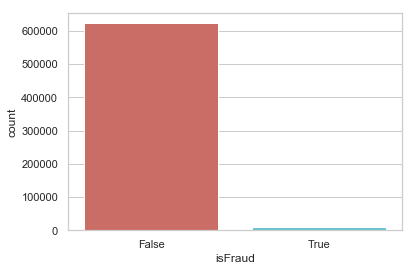

False    622954
True      10892
Name: isFraud, dtype: int64

In [155]:
sns.countplot(x='isFraud', data=df, palette='hls')
plt.show()
df['isFraud'].value_counts()

In [89]:
df.merchantCategoryCode.unique()

array(['fastfood', 'mobileapps', 'food', 'hotels', 'online_retail',
       'entertainment', 'rideshare', 'online_gifts', 'fuel',
       'online_subscriptions', 'auto', 'airline', 'personal care', 'gym',
       'subscriptions', 'health', 'cable/phone', 'food_delivery',
       'furniture'], dtype=object)

Text(0, 0.5, 'Frequency of Fraud')

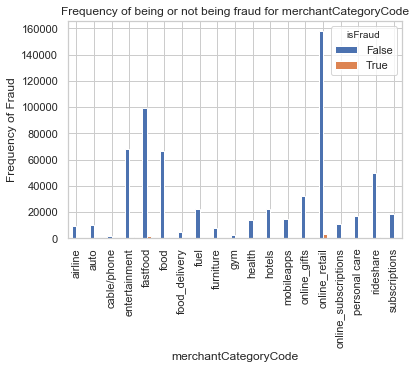

In [90]:
%matplotlib inline
pd.crosstab(df.merchantCategoryCode,df.isFraud).plot(kind='bar')
plt.title('Frequency of being fraud for merchantCategoryCode')
plt.xlabel('merchantCategoryCode')
plt.ylabel('Frequency of Fraud')

In [96]:
df.merchantCountryCode.unique()

array(['US', 'MEX', 'PR', 'CAN', nan], dtype=object)

Text(0, 0.5, 'Frequency of Fraud')

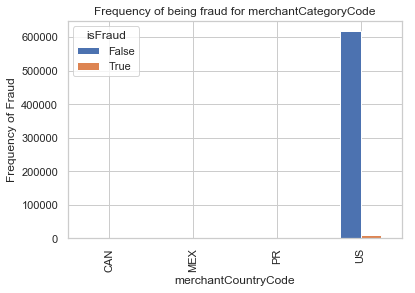

In [159]:
pd.crosstab(df.merchantCountryCode,df.isFraud).plot(kind='bar')
plt.title('Frequency of being fraud for merchantCategoryCode')
plt.xlabel('merchantCountryCode')
plt.ylabel('Frequency of Fraud')

as we can see in the plot, The frequency of being fraud does not depend on the merchantCountryCode. Thus, the merchantCountryCode can't be a good predictor of the outcome variable.

Text(0, 0.5, 'Frequency of Fraud')

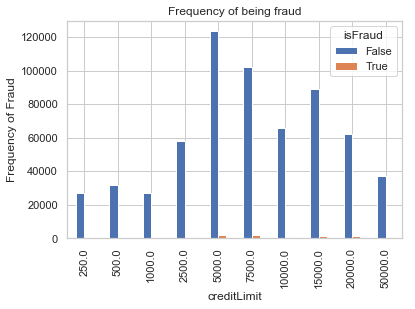

In [164]:
pd.crosstab(df.creditLimit,df.isFraud).plot(kind='bar')
plt.title('Frequency of being fraud')
plt.xlabel('creditLimit')
plt.ylabel('Frequency of Fraud')

even in this plot, as we can see, The frequency of being fraud does not depend on the creditLimit that much. Thus, the creditLimit either can't be a good predictor of the outcome variable.

In [165]:
df.head()

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,...,expirationDateKeyInMatch,isFraud,merchantCategoryCode,merchantCountryCode,merchantName,posConditionCode,posEntryMode,transactionAmount,transactionDateTime,transactionType
0,733493772,2014-08-03,US,5000.00,492,9184,False,5000.0,0.00,04/2020,...,False,True,rideshare,US,Lyft,01,05,111.33,2016-01-08T19:04:50,PURCHASE
1,733493772,2014-08-03,US,4888.67,492,9184,False,5000.0,111.33,06/2023,...,False,False,rideshare,US,Uber,01,09,24.75,2016-01-09T22:32:39,PURCHASE
2,733493772,2014-08-03,US,4863.92,492,9184,False,5000.0,136.08,12/2027,...,False,False,rideshare,US,Lyft,01,05,187.40,2016-01-11T13:36:55,PURCHASE
3,733493772,2014-08-03,US,4676.52,492,9184,False,5000.0,323.48,09/2029,...,False,True,rideshare,US,Lyft,01,02,227.34,2016-01-11T22:47:46,PURCHASE
4,733493772,2014-08-03,US,4449.18,492,9184,False,5000.0,550.82,10/2024,...,False,False,rideshare,US,Lyft,01,02,0.00,2016-01-16T01:41:11,ADDRESS_VERIFICATION




### I am going to convert 'transactionDateTime' to an appropriate datetime fotmat that later, we can use it.


In [171]:
df['date'] = dateTime_pdf[0]
df['Time'] = dateTime_pdf[1]
df['dateTime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['Time'].astype(str))
df.sort_values(by=['customerId','accountNumber','dateTime'], inplace=True)



In [173]:
dateTime_pdf.head()

,0,1
583485,2016-01-02,01:47:46
583486,2016-01-16,23:35:41
583487,2016-01-17,21:50:04
583488,2016-01-29,05:19:50
583489,2016-01-30,20:49:10


In [174]:
df[['customerId','accountNumber','dateTime','transactionAmount','transactionType']].head(10)

,customerId,accountNumber,dateTime,transactionAmount,transactionType
583485,100547107,100547107,2016-01-02 01:47:46,64.66,PURCHASE
583486,100547107,100547107,2016-01-16 23:35:41,5.31,PURCHASE
583487,100547107,100547107,2016-01-17 21:50:04,204.23,PURCHASE
583488,100547107,100547107,2016-01-29 05:19:50,155.28,PURCHASE
583489,100547107,100547107,2016-01-30 20:49:10,91.14,PURCHASE
583490,100547107,100547107,2016-02-06 22:31:44,2.80,PURCHASE
583491,100547107,100547107,2016-02-10 06:48:23,119.77,PURCHASE
583492,100547107,100547107,2016-02-11 08:28:07,211.11,PURCHASE
583493,100547107,100547107,2016-02-20 01:01:47,66.23,PURCHASE
583494,100547107,100547107,2016-02-26 04:02:55,1.06,PURCHASE


### moldel

I am trying to get a better way to gain an appropriate model

In [179]:
# keep only features (columns) that could be helpful in idetifying fraud
response_feature = ['isFraud']
feature_to_keep = ['acqCountry','availableMoney','cardPresent','creditLimit','currentBalance',
                  'expirationDateKeyInMatch','merchantCategoryCode',
                  'merchantCountryCode','transactionAmount']
                  
df = df[response_feature + feature_to_keep]

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633846 entries, 583485 to 171056
Data columns (total 10 columns):
isFraud                     633846 non-null bool
acqCountry                  633846 non-null object
availableMoney              633846 non-null float64
cardPresent                 633846 non-null bool
creditLimit                 633846 non-null float64
currentBalance              633846 non-null float64
expirationDateKeyInMatch    633846 non-null bool
merchantCategoryCode        633846 non-null object
merchantCountryCode         633846 non-null object
transactionAmount           633846 non-null float64
dtypes: bool(3), float64(4), object(3)
memory usage: 40.5+ MB


In [183]:
# unblanaced data
df.groupby('isFraud').count()

,acqCountry,availableMoney,cardPresent,creditLimit,currentBalance,expirationDateKeyInMatch,merchantCategoryCode,merchantCountryCode,transactionAmount
isFraud,,,,,,,,,
False,622954,622954,622954,622954,622954,622954,622954,622954,622954
True,10892,10892,10892,10892,10892,10892,10892,10892,10892


In [184]:
df_false = df[df.isFraud==False]

In [188]:
df_true = df[df.isFraud==True]

In [190]:
df_false_sample = df_false.sample(df_true.shape[0], replace=False)

In [191]:
df = df_true.append(df_false_sample)

In [192]:
df.groupby('isFraud').count()

,acqCountry,availableMoney,cardPresent,creditLimit,currentBalance,expirationDateKeyInMatch,merchantCategoryCode,merchantCountryCode,transactionAmount
isFraud,,,,,,,,,
False,10892,10892,10892,10892,10892,10892,10892,10892,10892
True,10892,10892,10892,10892,10892,10892,10892,10892,10892
